## Notebook Description
### Job of chatbot!
Chatbot that offering support for Adverse drug reaction, Blood pressure, Hospitals and Pharmacies.

1. Import libraries
    1. nltk: for tokenization and lemmatization.
    2. Json: for loading json file.
    3. pickle: for storing and transfering objects.
    4. numpy: for transforming data into respective shape.
    5. keras: for deep learning layers.
    6. random: for generating number values.
    7. matplotlib: for visualization.
    8. seaborn: for deteminng the boundries.
    9. pandas: for creating datafram with the history of the deep learning model.
    10. tkinter: for creating GUI
    
    
2. Load the dataset from json file
    ##### Files used:
    1. Intents.json – The data file which has predefined patterns and responses.    
    2. Words.pkl – This is a pickle file in which we store the words Python object that contains a list of our vocabulary.
    3. Classes.pkl – The classes pickle file contains the list of categories.
    4. chatbot_model.h5 – This is file that we saved our model.
    5. chatapp.py - This file created to predict the sentences and get the response

3. Preprocess data

4. Encoding the data before entered it into the model

5. Create training and testing data

6. Build deep learning model

7. Predict the response with GUI

#### NLP Concept used in this project:
1. Tokenization.
2. Lemmatization.
3. BOW.
4. Machers.

## Import Packages

In [1]:
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import json
import pickle
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Load the dataset

In [2]:
words=[]
classes = []
documents = []
ignore_words = ['?', '!']
data_file = open('intents.json').read()
intents = json.loads(data_file)

In [3]:
intents

{'intents': [{'tag': 'greeting',
   'patterns': ['Hi there',
    'How are you',
    'Is anyone there?',
    'Hey',
    'Hola',
    'Hello',
    'Good day'],
   'responses': ['Hello, thanks for asking',
    'Good to see you again',
    'Hi there, how can I help?'],
   'context': ['']},
  {'tag': 'goodbye',
   'patterns': ['Bye',
    'See you later',
    'Goodbye',
    'Nice chatting to you, bye',
    'Till next time'],
   'responses': ['See you!', 'Have a nice day', 'Bye! Come back again soon.'],
   'context': ['']},
  {'tag': 'thanks',
   'patterns': ['Thanks',
    'Thank you',
    "That's helpful",
    'Awesome, thanks',
    'Thanks for helping me'],
   'responses': ['Happy to help!', 'Any time!', 'My pleasure'],
   'context': ['']},
  {'tag': 'noanswer',
   'patterns': [],
   'responses': ["Sorry, can't understand you",
    'Please give me more info',
    'Not sure I understand'],
   'context': ['']},
  {'tag': 'options',
   'patterns': ['How you could help me?',
    'What you can do

### Converting dict into dataframe

In [4]:
df = pd.DataFrame.from_dict(intents)

In [5]:
df.head()

,intents
0,"{'tag': 'greeting', 'patterns': ['Hi there', '..."
1,"{'tag': 'goodbye', 'patterns': ['Bye', 'See yo..."
2,"{'tag': 'thanks', 'patterns': ['Thanks', 'Than..."
3,"{'tag': 'noanswer', 'patterns': [], 'responses..."
4,"{'tag': 'options', 'patterns': ['How you could..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   intents  14 non-null     object
dtypes: object(1)
memory usage: 240.0+ bytes


In [7]:
df.isnull().count()

intents    14
dtype: int64

## Data Preprocessing
Make tokenization

In [8]:
for intent in intents['intents']:
    for pattern in intent['patterns']:

        #tokenize each word
        w = nltk.word_tokenize(pattern)
        words.extend(w)
        #add documents in the corpus
        documents.append((w, intent['tag']))

        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

#### Now we will lemmatize each word and remove duplicate words from the list. Lemmatizing is the process of converting a word into its lemma form and then creating a pickle file to store the Python objects which we will use while predicting.

In [9]:
# lemmatize, lower each word and remove duplicates
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))
# sort classes
classes = sorted(list(set(classes)))
# documents = combination between patterns and intents
print (len(documents), "documents")
# classes = intents
print (len(classes), "classes", classes)
# words = all words, vocabulary
print (len(words), "unique lemmatized words", words)
# store words and classes
pickle.dump(words,open('words.pkl','wb'))
pickle.dump(classes,open('classes.pkl','wb'))

47 documents
9 classes ['adverse_drug', 'blood_pressure', 'blood_pressure_search', 'goodbye', 'greeting', 'hospital_search', 'options', 'pharmacy_search', 'thanks']
88 unique lemmatized words ["'s", ',', 'a', 'adverse', 'all', 'anyone', 'are', 'awesome', 'be', 'behavior', 'blood', 'by', 'bye', 'can', 'causing', 'chatting', 'check', 'could', 'data', 'day', 'detail', 'do', 'dont', 'drug', 'entry', 'find', 'for', 'give', 'good', 'goodbye', 'have', 'hello', 'help', 'helpful', 'helping', 'hey', 'hi', 'history', 'hola', 'hospital', 'how', 'i', 'id', 'is', 'later', 'list', 'load', 'locate', 'log', 'looking', 'lookup', 'management', 'me', 'module', 'nearby', 'next', 'nice', 'of', 'offered', 'open', 'patient', 'pharmacy', 'pressure', 'provide', 'reaction', 'related', 'result', 'search', 'searching', 'see', 'show', 'suitable', 'support', 'task', 'thank', 'thanks', 'that', 'there', 'till', 'time', 'to', 'transfer', 'up', 'want', 'what', 'which', 'with', 'you']


### Encoding the dataset
#### Here, we will create the training data in which we will provide the input and the output. Our input will be the pattern and output will be the class our input pattern belongs to. But the computer doesn’t understand text so we will convert text into numbers.

In [10]:
# create our training data
training = []
# create an empty array for our output
output_empty = [0] * len(classes)
# training set, bag of words for each sentence
for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # lemmatize each word - create base word, in attempt to represent related words
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    # create our bag of words array with 1, if word match found in current pattern
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)

    # output is a '0' for each tag and '1' for current tag (for each pattern)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])
# shuffle our features and turn into np.array
random.shuffle(training)
training = np.array(training)

C:\Users\Hp\AppData\Local\Temp\ipykernel_2328\695779775.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  training = np.array(training)


In [11]:
training

array([[list([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]),
        list([0, 0, 0, 0, 0, 0, 1, 0, 0])],
       [list([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
        list([0, 0, 0, 0, 0, 0, 0, 0, 1])],
       [list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]),
        list([0, 1, 0, 0, 0, 0, 0, 0, 0])],
       [list([0, 0, 0, 0, 0,

### Creating x as a input (patterns) and y as a output (intents)

In [12]:
x = list(training[:,0])
y = list(training[:,1])

#### Spliting the data into 80%  training and 20% testing

In [13]:
#splittig data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8)

## Build the deep learning model

### Here we will create the model layers

In [14]:
model = Sequential()
model.add(Dense(300, input_shape=(len(x[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(y[0]), activation='softmax'))

### We will compiling the model with "Stochastic Gradient Decent Algorothim", we used momentum optimizer

In [15]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

C:\Users\Hp\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               26700     
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 9)                 9

### Fitting the training-set

In [17]:
hist = model.fit(x_train, y_train, epochs=200, batch_size=5, verbose=1)

Epoch 1/200
8/8 [==============================] - 1s 3ms/step - loss: 2.2221 - accuracy: 0.0811
Epoch 2/200
8/8 [==============================] - 0s 2ms/step - loss: 2.1808 - accuracy: 0.1622
Epoch 3/200
8/8 [==============================] - 0s 2ms/step - loss: 2.1453 - accuracy: 0.1622
Epoch 4/200
8/8 [==============================] - 0s 2ms/step - loss: 2.1148 - accuracy: 0.1622
Epoch 5/200
8/8 [==============================] - 0s 2ms/step - loss: 2.0631 - accuracy: 0.3514
Epoch 6/200
8/8 [==============================] - 0s 2ms/step - loss: 2.0157 - accuracy: 0.2973
Epoch 7/200
8/8 [==============================] - 0s 3ms/step - loss: 1.9568 - accuracy: 0.2703
Epoch 8/200
8/8 [==============================] - 0s 2ms/step - loss: 1.8801 - accuracy: 0.2973
Epoch 9/200
8/8 [==============================] - 0s 2ms/step - loss: 1.9176 - accuracy: 0.2973
Epoch 10/200
8/8 [==============================] - 0s 3ms/step - loss: 1.7049 - accuracy: 0.3784
Epoch 11/200
8/8 [===========

In [18]:
model.save('chatbot_model.h5', hist)

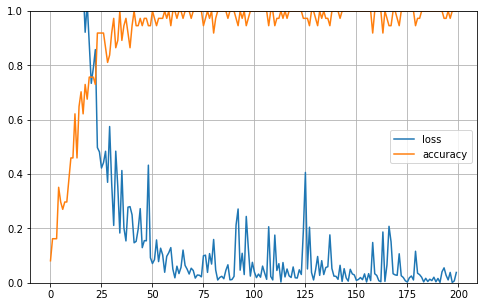

In [19]:
pd.DataFrame(hist.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

In [20]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 253ms/step - loss: 1.1783 - accuracy: 0.8000


[1.1783167123794556, 0.800000011920929]

## Predict the response (GUI)

#### We will load the trained model and then use a graphical user interface that will predict the response from the bot. The model will only tell us the class it belongs to, so we will implement some functions which will identify the class and then retrieve us a random response from the list of responses.

In [21]:
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import pickle
import numpy as np

from keras.models import load_model
model = load_model('chatbot_model.h5')
import json
import random
intents = json.loads(open('intents.json').read())
words = pickle.load(open('words.pkl','rb'))
classes = pickle.load(open('classes.pkl','rb'))

#### To predict the class, we will need to provide input in the same way as we did while training. So we will create some functions that will perform text preprocessing and then predict the class.

In [22]:
def clean_up_sentence(sentence):
    # tokenize the pattern - split words into array
    sentence_words = nltk.word_tokenize(sentence)
    # stem each word - create short form for word
    sentence_words = [lemmatizer.lemmatize(word.lower()) for word in sentence_words]
    return sentence_words
# return bag of words array: 0 or 1 for each word in the bag that exists in the sentence

def bow(sentence, words, show_details=True):
    # tokenize the pattern
    sentence_words = clean_up_sentence(sentence)
    # bag of words - matrix of N words, vocabulary matrix
    bag = [0]*len(words) 
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s: 
                # assign 1 if current word is in the vocabulary position
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)
    return(np.array(bag))

def predict_class(sentence, model):
    # filter out predictions below a threshold
    p = bow(sentence, words,show_details=False)
    res = model.predict(np.array([p]))[0]
    ERROR_THRESHOLD = 0.25
    results = [[i,r] for i,r in enumerate(res) if r>ERROR_THRESHOLD]
    # sort by strength of probability
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append({"intent": classes[r[0]], "probability": str(r[1])})
    return return_list

#### we will get a random response from the list of intents.

In [23]:
def getResponse(ints, intents_json):
    tag = ints[0]['intent']
    list_of_intents = intents_json['intents']
    for i in list_of_intents:
        if(i['tag']== tag):
            result = random.choice(i['responses'])
            break
    return result

def chatbot_response(text):
    ints = predict_class(text, model)
    res = getResponse(ints, intents)
    return res

#### Now we will develop a graphical user interface. Let’s use Tkinter library which is shipped with tons of useful libraries for GUI. We will take the input message from the user and then use the helper functions we have created to get the response from the bot and display it on the GUI. Here is the full source code for the GUI.

In [25]:
#Creating GUI with tkinter
import tkinter 
from tkinter import *


def send():
    msg = EntryBox.get("1.0",'end-1c').strip()
    EntryBox.delete("0.0",END)

    if msg != '':
        ChatLog.config(state=NORMAL)
        ChatLog.insert(END, "You: " + msg + '\n\n')
        ChatLog.config(foreground="#442265", font=("Verdana", 12 ))

        res = chatbot_response(msg)
        ChatLog.insert(END, "Bot: " + res + '\n\n')

        ChatLog.config(state=DISABLED)
        ChatLog.yview(END)

base = Tk()
base.title("Hello")
base.geometry("400x500")
base.resizable(width=FALSE, height=FALSE)

#Create Chat window
ChatLog = Text(base, bd=0, bg="white", height="8", width="50", font="Arial",)

ChatLog.config(state=DISABLED)

#Bind scrollbar to Chat window
scrollbar = Scrollbar(base, command=ChatLog.yview, cursor="heart")
ChatLog['yscrollcommand'] = scrollbar.set

#Create Button to send message
SendButton = Button(base, font=("Verdana",12,'bold'), text="Send", width="12", height=5,
                    bd=0, bg="#32de97", activebackground="#3c9d9b",fg='#ffffff',
                    command= send )

#Create the box to enter message
EntryBox = Text(base, bd=0, bg="white",width="29", height="5", font="Arial")
#EntryBox.bind("<Return>", send)


#Place all components on the screen
scrollbar.place(x=376,y=6, height=386)
ChatLog.place(
    x=6,y=6, height=386, width=370)
EntryBox.place(x=128, y=401, height=90, width=265)
SendButton.place(x=6, y=401, height=90)

base.mainloop()

1/1 [==============================] - 0s 16ms/step


### Reference
- Data-flair Website